In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cs-3110-mini-project/sample_submission.csv
/kaggle/input/cs-3110-mini-project/train.csv
/kaggle/input/cs-3110-mini-project/test.csv


**Import Libraries**

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from statistics import mean
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
import catboost as ctb
import numpy as np
from sklearn.preprocessing import StandardScaler

**Train & Test dataset**

In [3]:
data_path_train = '/kaggle/input/cs-3110-mini-project/train.csv'
data_path_test = '/kaggle/input/cs-3110-mini-project/test.csv'

df = pd.read_csv(data_path_train)
df_test = pd.read_csv(data_path_test)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2321 entries, 0 to 2320
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             2321 non-null   int64  
 1   account_length          2319 non-null   float64
 2   location_code           2321 non-null   int64  
 3   intertiol_plan          2318 non-null   object 
 4   voice_mail_plan         2315 non-null   object 
 5   number_vm_messages      2318 non-null   float64
 6   total_day_min           2320 non-null   float64
 7   total_day_calls         2318 non-null   float64
 8   total_day_charge        2316 non-null   float64
 9   total_eve_min           2318 non-null   float64
 10  total_eve_calls         2317 non-null   float64
 11  total_eve_charge        2313 non-null   float64
 12  total_night_minutes     2319 non-null   float64
 13  total_night_calls       2316 non-null   float64
 14  total_night_charge      2316 non-null   

In [5]:
df.describe()

,customer_id,account_length,location_code,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Unnamed: 20
count,2321.000000,2319.000000,2321.000000,2318.000000,2320.000000,2318.000000,2316.000000,2318.000000,2317.000000,2313.000000,2319.000000,2316.000000,2316.000000,2319.000000,2318.000000,2316.000000,2320.000000,0.0
mean,2161.000000,101.400172,473.470918,7.557377,182.718103,105.324418,30.961524,203.511734,100.125162,17.123130,209.543467,87.641192,9.436710,10.247736,4.439172,2.773364,1.651724,NaN
std,670.159309,40.044985,42.011853,14.250001,73.332822,221.100535,9.830271,115.552100,20.536224,4.327327,408.066120,12.737232,18.656075,2.795472,2.461172,0.733526,1.429166,NaN
min,1001.000000,1.000000,445.000000,-202.000000,-179.900000,-1.000000,-25.600000,-103.300000,-80.000000,0.000000,23.200000,33.000000,1.040000,-9.300000,0.000000,0.000000,0.000000,NaN
25%,1581.000000,74.000000,445.000000,0.000000,144.000000,87.000000,24.480000,165.925000,87.000000,14.180000,167.350000,79.000000,7.530000,8.600000,3.000000,2.320000,1.000000,NaN
50%,2161.000000,101.000000,452.000000,0.000000,180.350000,102.000000,30.600000,202.400000,101.000000,17.210000,201.100000,90.000000,9.050000,10.300000,4.000000,2.780000,1.000000,NaN
75%,2741.000000,127.000000,452.000000,14.000000,221.000000,115.000000,37.590000,236.400000,114.000000,20.090000,235.050000,98.000000,10.582500,12.000000,6.000000,3.240000,2.000000,NaN
max,3321.000000,232.000000,547.000000,51.000000,2283.900000,10700.000000,60.960000,5186.400000,170.000000,30.830000,19700.000000,105.000000,900.150000,18.300000,20.000000,4.940000,9.000000,NaN


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             1500 non-null   int64  
 1   account_length          1500 non-null   int64  
 2   location_code           1498 non-null   float64
 3   intertiol_plan          1496 non-null   object 
 4   voice_mail_plan         1496 non-null   object 
 5   number_vm_messages      1499 non-null   float64
 6   total_day_min           1497 non-null   float64
 7   total_day_calls         1497 non-null   float64
 8   total_day_charge        1496 non-null   float64
 9   total_eve_min           1498 non-null   float64
 10  total_eve_calls         1500 non-null   int64  
 11  total_eve_charge        1491 non-null   float64
 12  total_night_minutes     1497 non-null   float64
 13  total_night_calls       1498 non-null   float64
 14  total_night_charge      1498 non-null   

**Clean Training Dataset**

In [7]:

df.drop_duplicates(subset=["account_length", "location_code" ,'intertiol_plan','voice_mail_plan' ,'number_vm_messages' ,'total_day_min', 'total_day_calls',"total_day_charge", "total_eve_min" ,'total_eve_charge','total_night_minutes' ,'total_night_calls' ,'total_night_charge', 'total_intl_minutes','total_intl_calls','total_intl_charge','customer_service_calls','Churn'] , inplace=True)

df.loc[df['number_vm_messages']<0,'number_vm_messages']=0
df.loc[df['total_day_min']<0,'total_day_min']=0
df.loc[df['total_day_calls']<0,'total_day_calls']=0
df.loc[df['total_day_charge']<0,'total_day_charge']=0
df.loc[df['total_eve_min']<0,'total_eve_min']=0
df.loc[df['total_eve_calls']<0,'total_eve_calls']=0
df.loc[df['total_intl_minutes']<0,'total_intl_minutes']=0


df.loc[    (df['voice_mail_plan'].isnull())    , "voice_mail_plan"   ] = 'no'


median_number_vm_messages = (df['number_vm_messages'].loc[df['number_vm_messages'] != 0]).median()
df['number_vm_messages'].fillna(median_number_vm_messages, inplace=True)


median_total_day_min = (df['total_day_min'].loc[df['total_day_min'] != 0]).median()
df['total_day_min'].fillna(median_total_day_min, inplace=True)


median_total_day_calls = (df['total_day_calls'].loc[df['total_day_calls'] != 0]).median()
df['total_day_calls'].fillna(median_total_day_calls, inplace=True)


mean_total_day_charge = (df['total_day_charge']).mean()
df['total_day_charge'].fillna(mean_total_day_charge, inplace=True)


for col in ['total_eve_min' , 'total_eve_calls'  , 'total_eve_charge' , 'account_length']:
    mean = (df[col].loc[df[col] != 0]).mean()
    df[col].fillna(mean, inplace=True)
    
    

for col in ['total_night_minutes' , 'total_night_calls'  , 'total_night_charge']:
    mean = (df[col].loc[df[col] != 0]).mean()
    df[col].fillna(mean, inplace=True)

    
df['intertiol_plan'].fillna('yes', inplace=True)

for col in ['total_intl_minutes' , 'total_intl_calls'  , 'total_intl_charge']:
    mean = (df[col].loc[df[col] != 0]).mean()
    df[col].fillna(mean, inplace=True)

    
mean = (df['customer_service_calls']).mean()
df['customer_service_calls'].fillna(int(mean), inplace=True)


df['Churn'].fillna('No', inplace=True)

df.drop(['Unnamed: 20'], axis = 1 , inplace =True)

df.loc[   (df['location_code'].isnull())    , "location_code"   ] = 452
df['intertiol_plan']=df.intertiol_plan.replace(to_replace=['no', 'yes'], value=[0, 1])
df['voice_mail_plan']=df.voice_mail_plan.replace(to_replace=['no', 'yes'], value=[0, 1])


**Clean Test Dataset**

In [8]:

df_test.loc[df_test['number_vm_messages']<0,'number_vm_messages']=0
df_test.loc[df_test['total_day_min']<0,'total_day_min']=0
df_test.loc[df_test['total_day_calls']<0,'total_day_calls']=0
df_test.loc[df_test['total_day_charge']<0,'total_day_charge']=0
df_test.loc[df_test['total_eve_min']<0,'total_eve_min']=0
df_test.loc[df_test['total_eve_calls']<0,'total_eve_calls']=0
df_test.loc[df_test['total_intl_minutes']<0,'total_intl_minutes']=0

df_test.loc[    (df_test['voice_mail_plan'].isnull())    , "voice_mail_plan"   ] = 'no'

median_number_vm_messages = (df_test['number_vm_messages'].loc[df_test['number_vm_messages'] != 0]).median()
df_test['number_vm_messages'].fillna(median_number_vm_messages, inplace=True)

median_total_day_min = (df_test['total_day_min'].loc[df_test['total_day_min'] != 0]).median()
df_test['total_day_min'].fillna(median_total_day_min, inplace=True)

median_total_day_calls = (df_test['total_day_calls'].loc[df_test['total_day_calls'] != 0]).median()
df_test['total_day_calls'].fillna(median_total_day_calls, inplace=True)

mean_total_day_charge = (df_test['total_day_charge']).mean()
df_test['total_day_charge'].fillna(mean_total_day_charge, inplace=True)


for col in ['total_eve_min' , 'total_eve_calls'  , 'total_eve_charge' , 'account_length']:
    mean = (df_test[col].loc[df_test[col] != 0]).mean()
    df_test[col].fillna(mean, inplace=True)   

for col in ['total_night_minutes' , 'total_night_calls'  , 'total_night_charge']:
    mean = (df_test[col].loc[df_test[col] != 0]).mean()
    df_test[col].fillna(mean, inplace=True)

    
df_test['intertiol_plan'].fillna('yes', inplace=True)

for col in ['total_intl_minutes' , 'total_intl_calls'  , 'total_intl_charge']:
    mean = (df_test[col].loc[df_test[col] != 0]).mean()
    df_test[col].fillna(mean, inplace=True)

    
mean = (df_test['customer_service_calls']).mean()
df_test['customer_service_calls'].fillna(int(mean), inplace=True)

df_test.drop(['Unnamed: 20'], axis = 1 , inplace =True)
df_test.drop(['Unnamed: 19'], axis = 1 , inplace =True)
df_test.loc[   (df_test['location_code'].isnull())    , "location_code"   ] = 452

df_test['intertiol_plan']=df_test.intertiol_plan.replace(to_replace=['no', 'yes'], value=[0, 1])
df_test['voice_mail_plan']=df_test.voice_mail_plan.replace(to_replace=['no', 'yes'], value=[0, 1])


In [9]:
df.describe()

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
count,2317.000000,2317.000000,2317.000000,2317.000000,2317.000000,2317.000000,2317.000000,2317.000000,2317.000000,2317.000000,2317.000000,2317.000000,2317.000000,2317.000000,2317.000000,2317.000000,2317.000000,2317.000000,2317.000000
mean,2160.595166,101.380562,473.470004,0.122572,0.256798,7.686664,182.943591,105.342253,30.974788,203.605025,100.199965,17.126977,209.487084,87.634948,9.434183,10.262163,4.439968,2.774362,1.652136
std,670.138937,39.973100,42.011447,0.328016,0.436961,13.592301,72.587088,221.145496,9.773733,115.437679,20.054220,4.315869,408.236964,12.728667,18.651813,2.737390,2.459881,0.732568,1.429039
min,1001.000000,1.000000,445.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,1580.000000,74.000000,445.000000,0.000000,0.000000,0.000000,144.000000,87.000000,24.500000,166.200000,87.000000,14.190000,167.300000,79.000000,7.530000,8.600000,3.000000,2.320000,1.000000
50%,2161.000000,101.000000,452.000000,0.000000,0.000000,0.000000,180.400000,102.000000,30.650000,202.500000,101.000000,17.200000,201.100000,90.000000,9.060000,10.300000,4.000000,2.780000,1.000000
75%,2741.000000,127.000000,452.000000,0.000000,1.000000,15.000000,221.000000,115.000000,37.590000,236.400000,114.000000,20.080000,235.000000,98.000000,10.580000,12.000000,6.000000,3.240000,2.000000
max,3321.000000,232.000000,547.000000,1.000000,1.000000,51.000000,2283.900000,10700.000000,60.960000,5186.400000,170.000000,30.830000,19700.000000,105.000000,900.150000,18.300000,20.000000,4.940000,9.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2317 entries, 0 to 2320
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             2317 non-null   int64  
 1   account_length          2317 non-null   float64
 2   location_code           2317 non-null   int64  
 3   intertiol_plan          2317 non-null   int64  
 4   voice_mail_plan         2317 non-null   int64  
 5   number_vm_messages      2317 non-null   float64
 6   total_day_min           2317 non-null   float64
 7   total_day_calls         2317 non-null   float64
 8   total_day_charge        2317 non-null   float64
 9   total_eve_min           2317 non-null   float64
 10  total_eve_calls         2317 non-null   float64
 11  total_eve_charge        2317 non-null   float64
 12  total_night_minutes     2317 non-null   float64
 13  total_night_calls       2317 non-null   float64
 14  total_night_charge      2317 non-null   

In [11]:
df_test.head()

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
0,3322,91,445.0,1,0,0.0,258.4,112.0,42.89,190.0,93,14.47,158.6,105.0,7.09,12.1,3.0,3.27,2.0
1,3323,113,445.0,0,1,20.0,155.8,81.0,28.83,168.5,62,13.73,275.5,105.0,12.22,8.7,3.0,2.35,5.0
2,3324,122,445.0,0,0,0.0,237.2,137.0,40.30,263.8,134,22.76,251.3,105.0,10.81,8.8,4.0,2.38,1.0
3,3325,103,445.0,0,0,0.0,133.6,117.0,23.60,156.1,130,13.37,207.2,105.0,9.95,10.4,7.0,2.81,8.0
4,3326,111,452.0,0,0,0.0,115.6,120.0,24.54,211.1,66,18.79,140.9,105.0,5.76,12.7,1.0,3.43,4.0


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


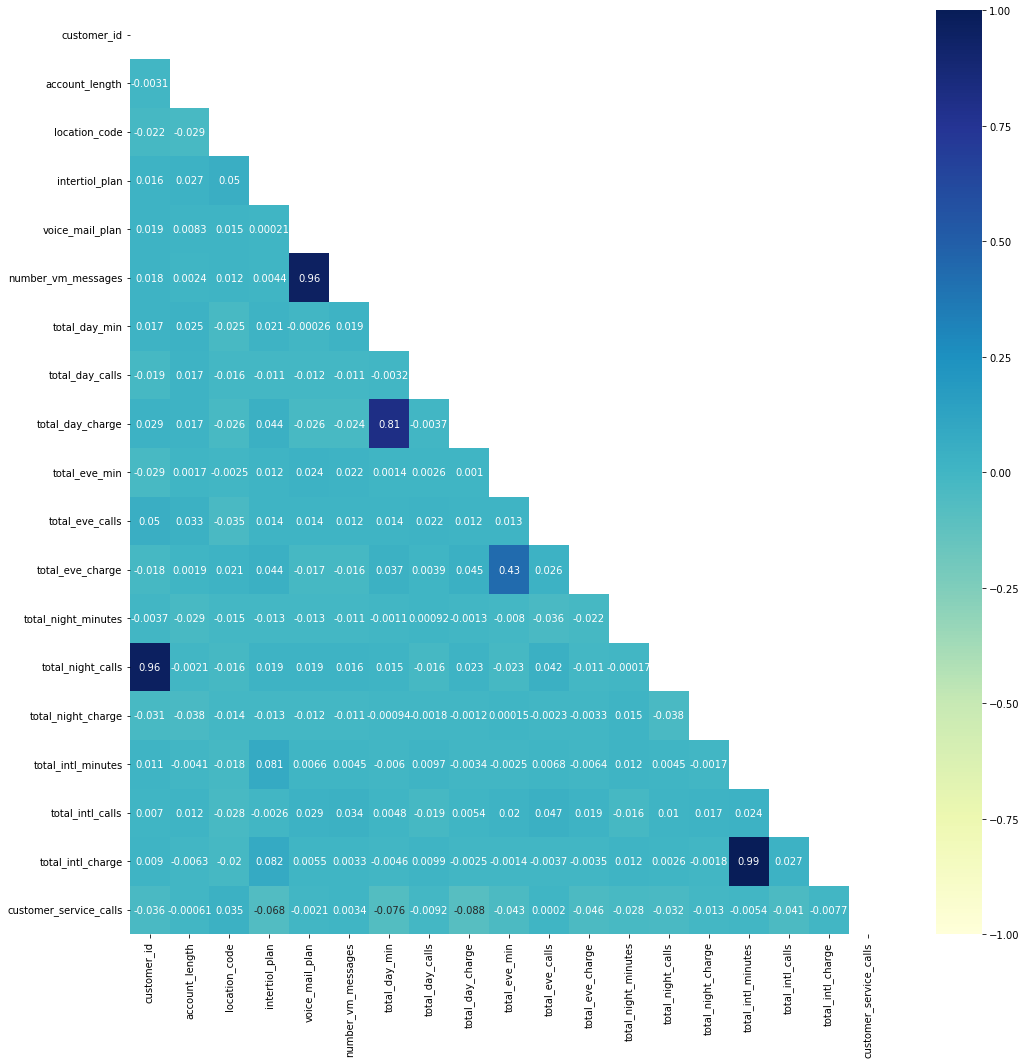

In [12]:
plt.figure(figsize=(17,17))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
dataplot = sns.heatmap(df.corr(),vmin=-1, vmax=1, cmap="YlGnBu", annot=True, mask=mask)

**Feature Creation**

In [13]:
df_train = df.copy()
df_test = df_test.copy()

df_train['çharge'] = df_train['total_day_charge']+ df_train['total_eve_charge'] + df_train['total_night_charge'] + df_train['total_intl_charge']
df_test['çharge'] = df_test['total_day_charge']+ df_test['total_eve_charge'] + df_test['total_night_charge'] + df_test['total_intl_charge']
df_test['minutes'] = df_test['total_day_min']+ df_test['total_eve_min'] + df_test['total_night_minutes'] + df_test['total_intl_minutes']
df_train['minutes'] = df_train['total_day_min']+ df_train['total_eve_min'] + df_train['total_night_minutes'] + df_train['total_intl_minutes']

**Model Evaluation**

In [14]:

def model_score(model,trainX,trainY,name):
    scores = cross_val_score(model, trainX,trainY, cv=5)
    print(name , np.mean(scores))

In [15]:
trainX,trainY,testX = df_train.drop(columns=['Churn']), df_train['Churn'],df_test

model_score(DecisionTreeClassifier(random_state=42),trainX,trainY,'decision tree classifier =')
model_score(RandomForestClassifier(max_depth=20, random_state=0),trainX,trainY,'Random Forest Classifier =')
model_score(KNeighborsClassifier(n_neighbors=10),trainX,trainY,'KNN =')
model_score(GaussianNB(),trainX,trainY,'Gaussian NB =')
model_score(svm.SVC(),trainX,trainY,'SVM =')
# model_score(ctb.CatBoostClassifier(),trainX,trainY,'Cat Boost Classifier =')

decision tree classifier = 0.8365615923139942
Random Forest Classifier = 0.9559814180382811
KNN = 0.7095907499813808
Gaussian NB = 0.3051230729127877
SVM = 0.7518339912117376


**Selected Model**

In [16]:
model_CBC = ctb.CatBoostClassifier()
model_CBC.fit(trainX,trainY)
y_pred = model_CBC.predict(testX)
    
scor = cross_val_score(model_CBC,trainX,trainY,cv=5).mean()
print(scor)

Learning rate set to 0.014749
0:	learn: 0.6747152	total: 59.2ms	remaining: 59.2s
1:	learn: 0.6565153	total: 62.6ms	remaining: 31.2s
2:	learn: 0.6424319	total: 65.6ms	remaining: 21.8s
3:	learn: 0.6299721	total: 69.3ms	remaining: 17.3s
4:	learn: 0.6138213	total: 73.3ms	remaining: 14.6s
5:	learn: 0.6019430	total: 76.8ms	remaining: 12.7s
6:	learn: 0.5861834	total: 80ms	remaining: 11.3s
7:	learn: 0.5729712	total: 83.2ms	remaining: 10.3s
8:	learn: 0.5582174	total: 86.4ms	remaining: 9.51s
9:	learn: 0.5449019	total: 89.5ms	remaining: 8.86s
10:	learn: 0.5321053	total: 92.6ms	remaining: 8.32s
11:	learn: 0.5205282	total: 95.6ms	remaining: 7.87s
12:	learn: 0.5091023	total: 98.5ms	remaining: 7.48s
13:	learn: 0.4994120	total: 101ms	remaining: 7.15s
14:	learn: 0.4876963	total: 104ms	remaining: 6.86s
15:	learn: 0.4760326	total: 107ms	remaining: 6.59s
16:	learn: 0.4655945	total: 110ms	remaining: 6.36s
17:	learn: 0.4569626	total: 113ms	remaining: 6.15s
18:	learn: 0.4466616	total: 116ms	remaining: 5.97s


In [17]:
print("Score : ", scor)

Score :  0.9589986594175913


In [18]:
df_submit = pd.DataFrame(columns = ["customer_id", "Churn"])
df_submit['customer_id'],df_submit['Churn']  = df_test['customer_id'],y_pred
df_submit



,customer_id,Churn
0,3322,No
1,3323,No
2,3324,Yes
3,3325,Yes
4,3326,Yes
...,...,...
1495,4817,Yes
1496,4818,Yes
1497,4819,No
1498,4820,No
